In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd  /content/drive/MyDrive/CS506/Spark
%ls

/content/drive/MyDrive/CS506/Spark
Data/  date_temperature.csv  devices.csv  devs.csv  weather.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from scipy import stats

In [ ]:
weather = pd.read_csv("weather.csv")
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-01,6.26,0.10,0.0,34.0,36.0,29.0,320.0,17.0
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-02,14.32,0.41,0.0,39.0,42.0,32.0,310.0,28.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-03,9.40,0.03,0.2,33.0,36.0,29.0,20.0,17.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-04,11.41,0.00,0.0,34.0,39.0,31.0,30.0,17.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-05,10.74,0.01,0.0,32.0,33.0,30.0,340.0,15.0


In [ ]:
d_weather = dict()
for i in range(len(weather)):
  date = weather['DATE'][i]
  d_weather[date] = weather.iloc[i,6:]

In [4]:
devs = pd.read_csv("devs.csv")
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2,index,absC
0,39569,2021-08-25,1120,22.70,5.82,0.0,0.0,84,94,76,240,12.1,0,0.70
1,39569,2021-08-25,1024,22.70,5.82,0.0,0.0,84,94,76,240,12.1,1,0.70
2,39569,2021-08-25,944,22.70,5.82,0.0,0.0,84,94,76,240,12.1,2,0.70
3,39569,2021-08-25,872,22.70,5.82,0.0,0.0,84,94,76,240,12.1,3,0.70
4,39569,2021-08-25,808,25.74,5.82,0.0,0.0,84,94,76,240,12.1,4,3.74


In [ ]:
dev_set = set(devs['dev'])
f_names = ['celsius','absC','TAVG', 'TMAX','TMIN', 'AWND', 'PRCP', 'SNOW',  'WDF2', 'WSF2']
scores = { dev_id:[] for dev_id in dev_set}
for dev_id in dev_set:
  dev_data = devs[devs['dev']==dev_id]
  dev_psi = dev_data['psi']
  for f_name in f_names:
    f_data = dev_data[f_name]
    res = stats.pearsonr(f_data,dev_psi)
    scores[dev_id].append(res)

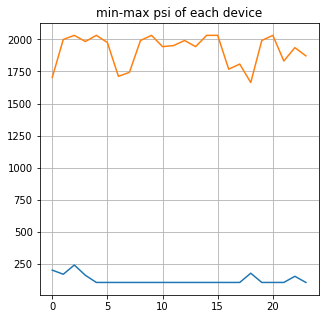

In [24]:
N = 5
mins,maxs = [min(devs[devs['dev']==dev_id]['psi']) for dev_id in sorted(list(dev_set))] , [max(devs[devs['dev']==dev_id]['psi']) for dev_id in sorted(list(dev_set))]
fig= plt.figure(figsize=(5, 5))

plt.plot(mins)
plt.plot(maxs)
plt.grid(True)
plt.title("min-max psi of each device")
plt.show()

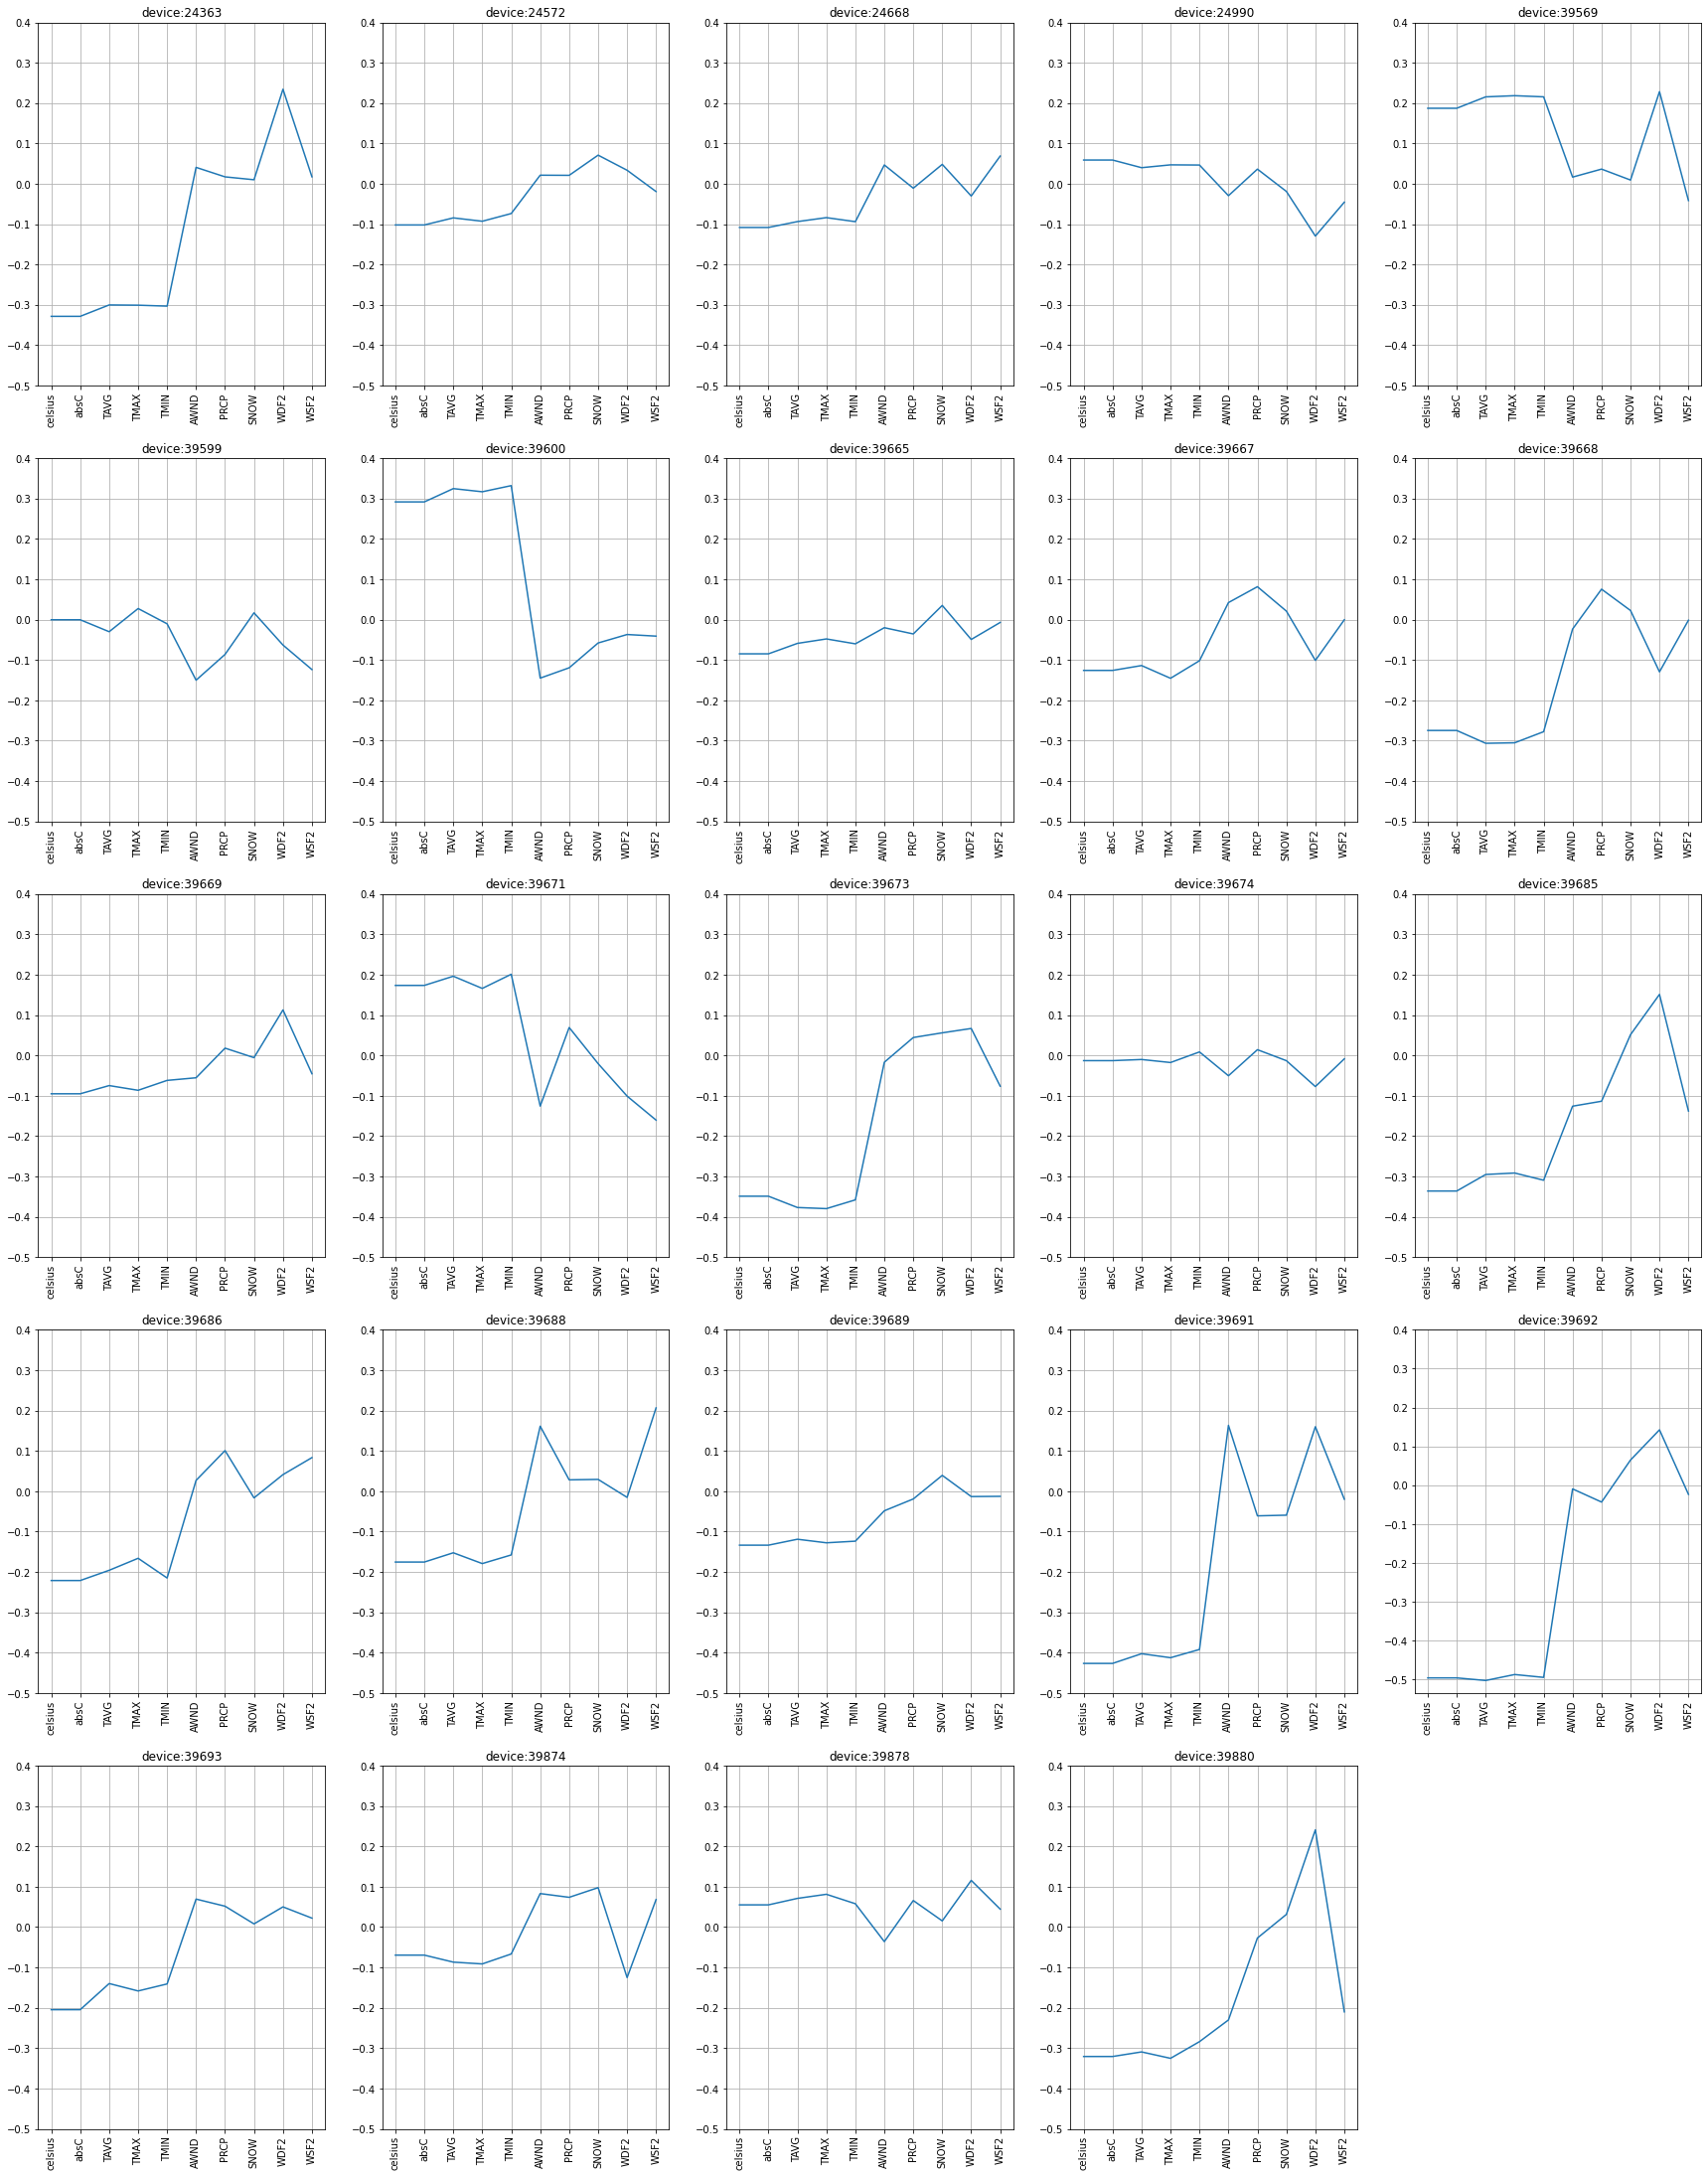

In [17]:
N = 5

fig= plt.figure(figsize=(30, 39))
for num,dev_id in enumerate(sorted(list(dev_set))):
  row,col = num//N,num%N
  plt.subplot(N,N,num+1)
  score = scores[dev_id]
  plt.plot([i[0] for i in score])
  plt.xticks(np.arange(10),f_names,rotation='vertical')
  plt.yticks(np.arange(-0.5, 0.5, step=0.1))
  plt.title(f'device:{dev_id}')
  plt.grid(True)
plt.show()

In [25]:
score_all = [] 
for f_name in f_names:
  f_data = devs[f_name]
  dev_psi = devs['psi']
  res = stats.pearsonr(f_data,dev_psi)
  score_all.append(res)

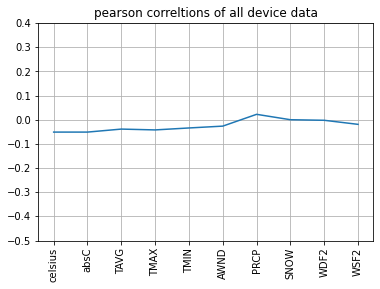

In [38]:
N = 5
# fig= plt.figure(figsize=(5, 5))

plt.plot([i[0] for i in score_all])
plt.xticks(np.arange(10),f_names,rotation='vertical')
plt.yticks(np.arange(-0.5, 0.5, 0.1))
plt.grid(True)
plt.title("pearson correltions of all device data")
plt.show()

In [ ]:
devs.to_csv('devs.csv',index=False)

In [ ]:
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25,1120,22.70,5.82,0.0,0,84,94,76,240,12.1
1,39569,2021-08-25,1024,22.70,5.82,0.0,0,84,94,76,240,12.1
2,39569,2021-08-25,944,22.70,5.82,0.0,0,84,94,76,240,12.1
3,39569,2021-08-25,872,22.70,5.82,0.0,0,84,94,76,240,12.1
4,39569,2021-08-25,808,25.74,5.82,0.0,0,84,94,76,240,12.1


In [ ]:

res = stats.pearsonr([1, 2, 3, 4, 5], [10, 9, 2.5, 6, 4])
res

(-0.7426106572325059, 0.15055580885344538)

In [ ]:
devs.to_csv('devs.csv',index=False)

In [ ]:
devs.iloc[0,5:]

PRCP     0.0
SNOW       0
TAVG      84
TMAX      94
TMIN      76
WDF2     240
WSF2    12.1
Name: 0, dtype: object

In [ ]:
devs['date'] = devs['date'].apply(get_date)
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
import copy
import numpy as np
import torch
from tqdm import tqdm
from sklearn.model_selection import train_test_split
 
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)
 
# training parameters
n_epochs = 100   # number of epochs to run
batch_size = 64  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
model = get_model()
# training loop
for epoch in tqdm(range(n_epochs)):
    model.train()
    with tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)

100%|██████████| 100/100 [05:07<00:00,  3.08s/it]


<All keys matched successfully>

In [ ]:
devs[[ 'AWND','PRCP', 'SNOW', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WSF2']] = 0
devs.head()

,dev,date,psi,celsius,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25T12:14:32,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25T12:15:08,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25T12:21:52,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25T12:22:53,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25T12:27:45,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
def get_dev_id(name):
  return name.split('.')[1].split('_')[0]
def get_date(time):
  return time.split('T')[0]
def date_to_num(date):
  _,m,d = date.split("-")
  m,d = int(m),int(d)
  res = ((m-1)*30+d)/360
  return int(365*res)

In [ ]:
devs.to_csv('devices.csv',index=False)

In [ ]:
weather.dropna(axis=1,how="any",inplace=True)
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-01,6.26,",,W",0.10,",,W,2400",...,34.0,"H,,S",36.0,",,W",29.0,",,W",320.0,",,W",17.0,",,W"
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-02,14.32,",,W",0.41,",,W,2400",...,39.0,"H,,S",42.0,",,W",32.0,",,W",310.0,",,W",28.0,",,W"
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-03,9.40,",,W",0.03,",,W,2400",...,33.0,"H,,S",36.0,",,W",29.0,",,W",20.0,",,W",17.0,",,W"
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-04,11.41,",,W",0.00,"T,,W,2400",...,34.0,"H,,S",39.0,",,W",31.0,",,W",30.0,",,W",17.0,",,W"
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-05,10.74,",,W",0.01,",,W,2400",...,32.0,"H,,S",33.0,",,W",30.0,",,W",340.0,",,W",15.0,",,W"


In [ ]:
weather = weather[[i for i in weather.columns if "ATTR" not in i]]
weather.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-01,6.26,0.10,0.0,34.0,36.0,29.0,320.0,17.0
1,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-02,14.32,0.41,0.0,39.0,42.0,32.0,310.0,28.0
2,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-03,9.40,0.03,0.2,33.0,36.0,29.0,20.0,17.0
3,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-04,11.41,0.00,0.0,34.0,39.0,31.0,30.0,17.0
4,USW00014739,"BOSTON LOGAN INTERNATIONAL AIRPORT, MA US",42.36057,-71.00975,3.2,2021-01-05,10.74,0.01,0.0,32.0,33.0,30.0,340.0,15.0


In [ ]:
weather.to_csv('weather.csv',index=False)

In [ ]:
dev = pd.read_csv('devices.csv',header=None)
dev.head()

,0,1,2,3
0,39569,2021-08-25T12:14:32,1120,22.70
1,39569,2021-08-25T12:15:08,1024,22.70
2,39569,2021-08-25T12:21:52,944,22.70
3,39569,2021-08-25T12:22:53,872,22.70
4,39569,2021-08-25T12:27:45,808,25.74


In [ ]:
dev[['AWND','PRCP','SNOW','TAVG','TMAX','TMIN','WDF2','WSF2']]=0
dev.head()

,0,1,2,3,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,WDF2,WSF2
0,39569,2021-08-25T12:14:32,1120,22.70,0,0,0,0,0,0,0,0
1,39569,2021-08-25T12:15:08,1024,22.70,0,0,0,0,0,0,0,0
2,39569,2021-08-25T12:21:52,944,22.70,0,0,0,0,0,0,0,0
3,39569,2021-08-25T12:22:53,872,22.70,0,0,0,0,0,0,0,0
4,39569,2021-08-25T12:27:45,808,25.74,0,0,0,0,0,0,0,0


In [ ]:
f_name = ['DATE','TAVG','TMAX','TMIN']
weather[f_name].head()

,DATE,TAVG,TMAX,TMIN
6763,2021-01-01,34.0,36.0,29.0
6764,2021-01-02,39.0,42.0,32.0
6765,2021-01-03,33.0,36.0,29.0
6766,2021-01-04,34.0,39.0,31.0
6767,2021-01-05,32.0,33.0,30.0


In [ ]:
weather[f_name].to_csv("date_temperature.csv",index=False)
test = pd.read_csv("date_temperature.csv")
test.head()

,DATE,TAVG,TMAX,TMIN
0,2021-01-01,34.0,36.0,29.0
1,2021-01-02,39.0,42.0,32.0
2,2021-01-03,33.0,36.0,29.0
3,2021-01-04,34.0,39.0,31.0
4,2021-01-05,32.0,33.0,30.0


In [ ]:
filename = 'readings_device.24363_from.2021-07-01_to.2021-10-02.csv'

dev_id = filename.split('.')[1].split('_')[0]
dev_id

'24363'

In [ ]:
dataset = pd.read_csv("./Data/readings_device.24363_from.2021-07-01_to.2021-10-02.csv")
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit
0,2021-08-24T10:11:19,1104,24.96,76.928
1,2021-08-24T10:12:52,1008,24.96,76.928
2,2021-08-24T10:14:19,1096,24.96,76.928
3,2021-08-24T10:20:15,968,24.96,76.928
4,2021-08-24T10:41:45,1168,24.96,76.928


In [ ]:
dataset['season'] = [date_to_num(get_date(time)) for time in dataset['readingDtUtz']]
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit,season
0,2021-08-24T10:11:19,1104,24.96,76.928,237
1,2021-08-24T10:12:52,1008,24.96,76.928,237
2,2021-08-24T10:14:19,1096,24.96,76.928,237
3,2021-08-24T10:20:15,968,24.96,76.928,237
4,2021-08-24T10:41:45,1168,24.96,76.928,237


In [ ]:
dataset['dev_id'] = dev_id
dataset.head()

,readingDtUtz,valuePsi,celsius,fahrenheit,dev_id
0,2021-08-24T10:11:19,1104,24.96,76.928,24363
1,2021-08-24T10:12:52,1008,24.96,76.928,24363
2,2021-08-24T10:14:19,1096,24.96,76.928,24363
3,2021-08-24T10:20:15,968,24.96,76.928,24363
4,2021-08-24T10:41:45,1168,24.96,76.928,24363


,readingDtUtz,valuePsi,celsius,fahrenheit,season
0,2021-08-24T10:11:19,1104,24.96,76.928,237
1,2021-08-24T10:12:52,1008,24.96,76.928,237
2,2021-08-24T10:14:19,1096,24.96,76.928,237
3,2021-08-24T10:20:15,968,24.96,76.928,237
4,2021-08-24T10:41:45,1168,24.96,76.928,237
...,...,...,...,...,...
201,2021-09-29T11:21:43,848,10.93,51.674,272
202,2021-09-30T10:37:42,872,12.02,53.636,273
203,2021-09-30T10:39:27,1120,12.02,53.636,273
204,2021-09-30T20:14:36,1112,13.97,57.146,273


In [ ]:
dataset[['dev_id','readingDtUtz','valuePsi','celsius']].to_csv('devices.csv',mode='a',index=False,header=False)

In [ ]:
test = pd.read_csv('devices.csv')
test.head()

,dev_id,date,psi,celsius24363,2021-08-24T10:11:19,1104,24.96
0,24363,2021-08-24T10:12:52,1008,24.96,NaN,NaN,NaN
1,24363,2021-08-24T10:14:19,1096,24.96,NaN,NaN,NaN
2,24363,2021-08-24T10:20:15,968,24.96,NaN,NaN,NaN
3,24363,2021-08-24T10:41:45,1168,24.96,NaN,NaN,NaN
4,24363,2021-08-24T10:42:22,896,24.96,NaN,NaN,NaN


In [ ]:

for filename in os.listdir('./Data'):
  if 'readings' in filename:
    dev_id = get_dev_id(filename)
    dataset = pd.read_csv(f'./Data/{filename}')
    dataset['dev_id'] = dev_id
    dataset[['dev_id','readingDtUtz','valuePsi','celsius']].to_csv('devices.csv',mode='a',index=False,header=False)

In [ ]:
D_day = dict()
def record_D(data):
  v,d = data[1],data[4]
  if d not in D_day:
    D_day[d] = [v]
  else:
    D_day[d].append(v)
dataset.apply(record_D,axis=1)
D_day

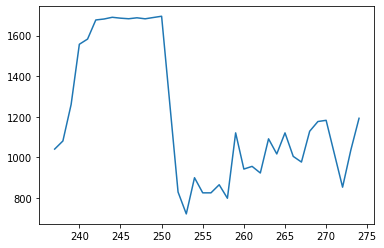

In [ ]:
days = [ i for i in D_day]
values = [np.mean(D_day[i]) for i in D_day]
plt.plot(days,values)
plt.show()

In [ ]:
print(max(dataset['valuePsi']))
print(min(dataset['valuePsi']))
print(max(dataset['celsius']))
print(min(dataset['celsius']))

1704
720
37.02
10.83


In [ ]:
get_date(dataset['readingDtUtz'][0])

'2021-08-24'

In [ ]:
dataset['celsius'].to_numpy().reshape(-1,1).shape

(206, 1)

In [ ]:

from sklearn.linear_model import LinearRegression
# >>> X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# >>> # y = 1 * x_0 + 2 * x_1 + 3
# >>> y = np.dot(X, np.array([1, 2])) + 3
X = dataset['celsius'].to_numpy().reshape(-1,1)
Y = dataset['valuePsi'].to_numpy().reshape(-1,1)
reg = LinearRegression().fit(X,Y)
reg.score(X, Y)

0.01411607582810881

In [ ]:
pre_x = np.array(range(-20,40))
pre_y = reg.predict(np.array(range(-20,40)).reshape(-1,1))

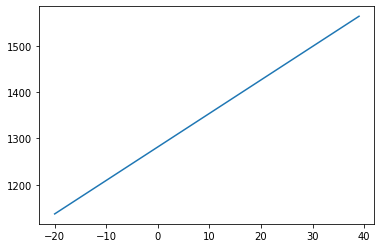

In [ ]:
plt.plot(pre_x,pre_y)
plt.show()